# RL.200 Special Project - 274742 
Custom OpenAI gym enviroment for RL-agent

In [1]:
import gym

from stable_baselines3 import PPO, DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.logger import configure

import pandas as pd
import numpy as np
import random
import glob
import matplotlib.pyplot as plt

In [2]:
# Importing custom gym
import gym_tictactoe

In [3]:
def evaluate_model_reward(env, n_episodes=10000, model=None):
    tmp_baseline_reward = 0
    
    for ep in range(n_episodes):
        observation = env.reset()
        for i in range(10):
            if model != None:
                action, _states = model.predict(np.array([observation]), 
                                                     deterministic=True
                                                    )
            else:
                # Based on random action
                actions = [i for i in range(len(observation)) if observation.tolist()[i]==0]
                action = random.choice(actions)
                
            observation, reward, done, info = env.step(action)
            tmp_baseline_reward += reward
            if done:
                break
    return tmp_baseline_reward /n_episodes


Trained model "models/ppo_agent_0"; logs "models/ppo_agent_0_log"

dummy model "models/ppo_agent_dummy"; logs "models/ppo_agent_dummy_log"

In [4]:
# Load trained model
trained_env = gym.make('tictactoe-v0')
trained_model_name = "ppo_agent_0"
trained_model_path = "models/" + trained_model_name
trained_log_path   = trained_model_path + "_log"

trained_model = PPO.load(trained_model_path, env=trained_env)

# Dummy model
dummy_env = gym.make('tictactoe-v0')
dummy_path = "models/ppo_agent_dummy"
dummy_log_path = dummy_path + "_log"

dummy_model = PPO.load(dummy_path, env=dummy_env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


# Creating and training RL-agent

In [6]:
create_n_train_model = False

if create_n_train_model:
    # creating training enviroment
    train_env = gym.make('tictactoe-v0', render=False, human_player=False)

    model_paths = glob.glob("models/*[!log]")
    model_name = "ppo_agent_" + str(len(model_paths))
    model_path = "models/" + model_name
    print("Model name:", model_name)

    # making logging interface for agent
    model_log_path = "models/" + model_name + "_log"
    new_logger = configure(model_log_path, 
                           ["stdout", "csv", "tensorboard"]
                          )
    # Loading agent
    model_train = PPO("MlpPolicy",
                train_env,
                clip_range=0.15,
                verbose=1
               )

    # adding logger
    model_train.set_logger(new_logger)
else:
    model_log_path = trained_log_path

In [7]:
# Training the model
if create_n_train_model:
    model_train.learn(total_timesteps=500000)
    model_train.save("models/" + model_name)

# Plot training histories

Loading model from path: models/ppo_agent_0_log


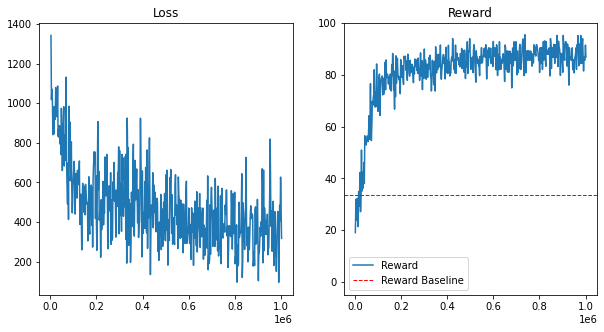

In [8]:
# Plot loss and reward of training
plot_log_path = model_log_path 

# Baseline model
print("Loading model logs from path:", plot_log_path)

# Loading training history
training_history = pd.read_csv(plot_log_path + "\progress.csv")

x_axis = training_history["time/total_timesteps"]

# Loss plot
plt.figure(figsize=(10, 5))
# display reconstruction
bx = plt.subplot(1, 2, 1)
plt.plot(x_axis, training_history["train/loss"])
plt.title("Loss")

# Reward plot
y_baseline_reward = evaluate_model_reward(env=gym.make('tictactoe-v0'))

bx = plt.subplot(1, 2, 2)
plt.title("Reward")
plt.ylim([-5, 100])
plt.plot(x_axis, training_history["rollout/ep_rew_mean"])
plt.axhline(y=y_baseline_reward, color='r', linestyle='--', linewidth=1)
plt.legend(['Reward', 'Reward Baseline'])
plt.show()

## Evaluate model

In [9]:
# Loading test env
test_env = gym.make('tictactoe-v0', 
               render=False,       # If wanted to render every action
               human_player=False  # True; If want to play against the AI 
              )
# Load model
if create_n_train_model:
    test_model = model_train

test_model = trained_model
#test_model = dummy_model

In [10]:
episodes_avg_reward = evaluate_model_reward(env=test_env, n_episodes=1000, model=test_model)
print("Evaluating model>")
print(" Baseline reward:", evaluate_model_reward(env=test_env))
print(" Models average reward:", episodes_avg_reward)

Baseline reward: 34.0585
Models average reward: 86.581
